In [127]:
import pandas as pd

In [128]:
xls = pd.ExcelFile('International_Finance_Statistics -Australia.xlsx')
df1 = pd.read_excel(xls, 'total_aus')


In [129]:
xls2 = pd.ExcelFile('International_Finance_Statistics -Japan.xlsx')
df2 = pd.read_excel(xls2, 'total_jap')

In [130]:
xls3 = pd.ExcelFile('International_Finance_Statistics-US.xlsx')
df3 = pd.read_excel(xls3, 'total_US')

In [131]:
xls4 = pd.ExcelFile('VIX_History.xlsx')
df4 = pd.read_excel(xls4)

In [132]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    8129 non-null   datetime64[ns]
 1   CLOSE   8129 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 127.1 KB


In [136]:
df1.head()

,Indicator,"National Currency per SDR, End of Period_aus",Central Bank Policy Rate_aus,Money Market Rate_aus,Savings Rate_aus,Deposit Rate_aus,Lending Rate_aus,Government Bonds_aus,Consumer Prices_aus,Unemployment Rate (%)_aus,"Goods, Volume of Exports, US Dollars, Index_aus","Goods, Volume of Imports, Index_aus","Export Price Index, All Commodities, Index_aus","Import Price Index, All Commodities, Index_aus"
3,2009. 01,2.31737,NaN,4.25,NaN,NaN,NaN,NaN,96.25,5.32,NaN,NaN,119.65,92.902561
4,2009. 02,2.273574,NaN,3.35,NaN,NaN,NaN,NaN,96.25,5.97,NaN,NaN,119.65,92.180787
5,2009. 03,2.175287,NaN,3.25,NaN,NaN,NaN,NaN,96.25,6.04,NaN,NaN,119.65,90.943461
6,2009. 04,2.061708,NaN,3.06,NaN,NaN,NaN,NaN,96.67,5.57,NaN,NaN,95.05,91.665235
7,2009. 05,1.956585,NaN,3,NaN,NaN,NaN,NaN,96.67,5.83,NaN,NaN,95.05,93.108782


In [137]:
df1=df1.iloc[3:,:]
df2=df2.iloc[3:,:]
df3=df3.iloc[3:,:]
#df1.head()

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 6 to 128
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Indicator                                        123 non-null    object
 1   National Currency per SDR, End of Period_aus     123 non-null    object
 2   Central Bank Policy Rate_aus                     66 non-null     object
 3   Money Market Rate_aus                            123 non-null    object
 4   Savings Rate_aus                                 66 non-null     object
 5   Deposit Rate_aus                                 66 non-null     object
 6   Lending Rate_aus                                 66 non-null     object
 7   Government Bonds_aus                             66 non-null     object
 8   Consumer Prices_aus                              123 non-null    object
 9   Unemployment Rate (%)_aus                  

In [139]:
df1.set_index("Indicator", inplace = True)
df2.set_index("Indicator", inplace = True)
df3.set_index("Indicator", inplace = True)
df4.set_index("DATE",inplace=True)

In [140]:
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)
df3.index = pd.to_datetime(df3.index)
df4.index=pd.to_datetime(df4.index)

In [141]:
df1.index.name="date"
df2.index.name="date"
df3.index.name="date"
df4.index.name="date"

In [142]:
df4

,CLOSE
date,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2022-04-05,21.03
2022-04-06,22.10
2022-04-07,21.55


In [164]:
df_m = df4.resample("M").last()
df_m = df_m[['CLOSE']]
df_m['VIX'] = df_m.CLOSE.pct_change()
df_m = df_m[231:354]
df_m.index = pd.to_datetime(df_m.index, format = '%Y-%m-%d').strftime('%Y-%m-01')
df_m.index=pd.to_datetime(df_m.index)

In [165]:
df_m

,CLOSE,VIX
date,,
2009-04-01,36.50,-0.173086
2009-05-01,28.92,-0.207671
2009-06-01,26.35,-0.088866
2009-07-01,25.92,-0.016319
2009-08-01,26.01,0.003472
...,...,...
2019-02-01,14.70,-0.112855
2019-03-01,13.71,-0.067347
2019-04-01,13.12,-0.043034


In [149]:
df1.mean()
df1=df1.fillna(df1.mean())
df2.mean()
df2=df2.fillna(df2.mean())
df3.mean()
df3=df3.fillna(df3.mean())

C:\Users\PEIYAO~1\AppData\Local\Temp/ipykernel_1840/2591021794.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean()
C:\Users\PEIYAO~1\AppData\Local\Temp/ipykernel_1840/2591021794.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=df2.fillna(df2.mean())


In [150]:
df1

,"National Currency per SDR, End of Period_aus",Central Bank Policy Rate_aus,Money Market Rate_aus,Savings Rate_aus,Deposit Rate_aus,Lending Rate_aus,Government Bonds_aus,Consumer Prices_aus,Unemployment Rate (%)_aus,"Goods, Volume of Exports, US Dollars, Index_aus","Goods, Volume of Imports, Index_aus","Export Price Index, All Commodities, Index_aus","Import Price Index, All Commodities, Index_aus"
date,,,,,,,,,,,,,
2009-04-01,2.061708,1.829545,3.06,2.556061,2.231061,5.475848,2.72,96.670000,5.57,126.860937,121.050064,95.050000,91.665235
2009-05-01,1.956585,1.829545,3.00,2.556061,2.231061,5.475848,2.72,96.670000,5.83,126.860937,121.050064,95.050000,93.108782
2009-06-01,1.913022,1.829545,3.00,2.556061,2.231061,5.475848,2.72,96.670000,5.73,126.860937,121.050064,95.050000,94.139887
2009-07-01,1.875776,1.829545,3.00,2.556061,2.231061,5.475848,2.72,97.610000,5.27,126.860937,121.050064,85.880000,93.418113
2009-08-01,1.865915,1.829545,3.00,2.556061,2.231061,5.475848,2.72,97.610000,5.50,126.860937,121.050064,85.880000,94.552329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,1.956305,1.500000,1.50,2.150000,1.950000,5.366000,2.13,118.730489,5.38,128.178964,122.062488,122.113503,114.300280
2019-03-01,1.958869,1.500000,1.50,2.150000,1.900000,5.366000,1.96,118.730489,5.41,128.178964,122.062488,122.113503,114.300280
2019-04-01,1.968688,1.500000,1.50,2.150000,1.900000,5.366000,1.86,119.458897,5.27,137.362637,123.979298,126.698351,115.319908


In [151]:
df1.rename(columns = {'National Currency per SDR, End of Period_aus':'USDAUS', 'Export Price Index, All Commodities, Index_aus':'export_aus'}, inplace = True)

In [152]:
x1 = df1.iloc[:,1:12]
y1 = df1['USDAUS']

In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2009-04-01 to 2019-06-01
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   National Currency per SDR, End of Period_jap     123 non-null    float64
 1   Central Bank Policy Rate_jap                     91 non-null     object 
 2   Discount Rate_jap                                123 non-null    float64
 3   Money Market Rate_jap                            123 non-null    float64
 4   Treasury Bill Rate_jap                           123 non-null    float64
 5   Deposit Rate_jap                                 123 non-null    float64
 6   Lending Rate_jap                                 123 non-null    float64
 7   Government Bonds_jap                             123 non-null    float64
 8   Consumer Prices_jap                              123 non-null    float64
 9   Unemployment 

In [154]:
df2.rename(columns = {'National Currency per SDR, End of Period_jap':'USDJPY', 'Export Price Index, All Commodities, Index_jap':'export_jap'}, inplace = True)

In [155]:
x2 = df2.iloc[:,1:14]
y2 = df2['USDJPY']

In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2009-04-01 to 2019-06-01
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   National Currency per SDR, End of Period_us     123 non-null    float64
 1   Central Bank Policy Rate_us                     123 non-null    float64
 2   Discount Rate_us                                123 non-null    float64
 3   Money Market Rate_us                            123 non-null    float64
 4   Treasury Bill Rate_us                           123 non-null    float64
 5   Lending Rate_us                                 123 non-null    float64
 6   Government Bonds_us                             123 non-null    float64
 7   Unemployment Rate (%)_us                        123 non-null    float64
 8   Consumer Prices_us                              123 non-null    float64
 9   Goods, Volume of Exports

In [158]:
merged_df_aus = pd.merge(df1[['USDAUS','Money Market Rate_aus','export_aus','Consumer Prices_aus']], df3[['Export Price Index, All Commodities, Index_us','Consumer Prices_us',"Money Market Rate_us"]],
                         on="date")
merged_df_aus

,USDAUS,Money Market Rate_aus,export_aus,Consumer Prices_aus,"Export Price Index, All Commodities, Index_us",Consumer Prices_us,Money Market Rate_us
date,,,,,,,
2009-04-01,2.061708,3.06,95.050000,96.670000,94.294416,97.791617,0.15
2009-05-01,1.956585,3.00,95.050000,96.670000,94.700508,98.074114,0.18
2009-06-01,1.913022,3.00,95.050000,96.670000,95.675127,98.916560,0.21
2009-07-01,1.875776,3.00,85.880000,97.610000,95.350254,98.759719,0.16
2009-08-01,1.865915,3.00,85.880000,97.610000,95.918782,98.981223,0.16
...,...,...,...,...,...,...,...
2019-02-01,1.956305,1.50,122.113503,118.730489,104.610942,115.922781,2.40
2019-03-01,1.958869,1.50,122.113503,118.730489,105.059146,116.576743,2.41
2019-04-01,1.968688,1.50,126.698351,119.458897,105.417710,117.194017,2.42


In [159]:
merged_df_aus["diff_export"]=merged_df_aus["export_aus"]-merged_df_aus["Export Price Index, All Commodities, Index_us"]
merged_df_aus["diff_consumer"]=merged_df_aus["Consumer Prices_aus"]-merged_df_aus["Consumer Prices_us"]
merged_df_aus["diff_rate"]=merged_df_aus['Money Market Rate_aus']-merged_df_aus['Money Market Rate_us']
merged_df_aus=merged_df_aus.drop(['export_aus', 'Consumer Prices_aus',"Money Market Rate_aus",
                                  'Money Market Rate_us',
                                 "Export Price Index, All Commodities, Index_us","Consumer Prices_us"], axis=1)


In [160]:
merged_df_aus

,USDAUS,diff_export,diff_consumer,diff_rate
date,,,,
2009-04-01,2.061708,0.755584,-1.121617,2.91
2009-05-01,1.956585,0.349492,-1.404114,2.82
2009-06-01,1.913022,-0.625127,-2.246560,2.79
2009-07-01,1.875776,-9.470254,-1.149719,2.84
2009-08-01,1.865915,-10.038782,-1.371223,2.84
...,...,...,...,...
2019-02-01,1.956305,17.502561,2.807708,-0.90
2019-03-01,1.958869,17.054356,2.153746,-0.91
2019-04-01,1.968688,21.280640,2.264880,-0.92


In [166]:
df_m

,CLOSE,VIX
date,,
2009-04-01,36.50,-0.173086
2009-05-01,28.92,-0.207671
2009-06-01,26.35,-0.088866
2009-07-01,25.92,-0.016319
2009-08-01,26.01,0.003472
...,...,...
2019-02-01,14.70,-0.112855
2019-03-01,13.71,-0.067347
2019-04-01,13.12,-0.043034


In [167]:
merged_df_aus = pd.merge(merged_df_aus[['USDAUS','diff_export','diff_consumer','diff_rate']],df_m[["VIX"]],
                         on="date")

In [169]:
merged_df_aus

,USDAUS,diff_export,diff_consumer,diff_rate,VIX
date,,,,,
2009-04-01,2.061708,0.755584,-1.121617,2.91,-0.173086
2009-05-01,1.956585,0.349492,-1.404114,2.82,-0.207671
2009-06-01,1.913022,-0.625127,-2.246560,2.79,-0.088866
2009-07-01,1.875776,-9.470254,-1.149719,2.84,-0.016319
2009-08-01,1.865915,-10.038782,-1.371223,2.84,0.003472
...,...,...,...,...,...
2019-02-01,1.956305,17.502561,2.807708,-0.90,-0.112855
2019-03-01,1.958869,17.054356,2.153746,-0.91,-0.067347
2019-04-01,1.968688,21.280640,2.264880,-0.92,-0.043034


In [172]:
merged_df_jap = pd.merge(df2[['USDJPY','Consumer Prices_jap','export_jap','Money Market Rate_jap',"Production_Prices_jap"]], 
                         df3[['Consumer Prices_us', 'Export Price Index, All Commodities, Index_us','Money Market Rate_us',"Production_Prices_us"]], 
                         on="date")
merged_df_jap

,USDJPY,Consumer Prices_jap,export_jap,Money Market Rate_jap,Production_Prices_jap,Consumer Prices_us,"Export Price Index, All Commodities, Index_us",Money Market Rate_us,Production_Prices_us
date,,,,,,,,,
2009-04-01,146.188319,101.225727,105.565737,0.104000,100.772628,97.791617,94.294416,0.15,93.643528
2009-05-01,149.386817,101.018509,103.829459,0.102000,100.382037,98.074114,94.700508,0.18,94.584947
2009-06-01,148.936104,100.811292,104.871226,0.104000,99.991445,98.916560,95.675127,0.21,96.412408
2009-07-01,148.078996,100.500466,103.134947,0.102000,100.479684,98.759719,95.350254,0.16,95.526366
2009-08-01,145.174021,100.811292,104.408218,0.106000,100.382037,98.981223,95.918782,0.16,96.910807
...,...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,105.150290,99.083631,0.062629,100.497420,115.922781,104.610942,2.40,114.334876
2019-03-01,153.984765,105.150290,98.736375,0.062629,100.010985,116.576743,105.059146,2.41,113.792423
2019-04-01,154.789323,105.466690,98.736375,0.062629,99.913698,117.194017,105.417710,2.42,114.159272


In [173]:
merged_df_jap["diff_consumer"]=merged_df_jap["Consumer Prices_us"]-merged_df_jap["Consumer Prices_jap"]
#merged_df_jap["diff_export"]=merged_df_jap["Export Price Index, All Commodities, Index_jap"]-merged_df_jap["Export Price Index, All Commodities, Index_us"]
merged_df_jap["diff_money_market"]=merged_df_jap["Money Market Rate_us"]-merged_df_jap["Money Market Rate_jap"]
merged_df_jap["diff_production"]=merged_df_jap["Production_Prices_us"]-merged_df_jap["Production_Prices_jap"]

In [174]:
merged_df_jap

,USDJPY,Consumer Prices_jap,export_jap,Money Market Rate_jap,Production_Prices_jap,Consumer Prices_us,"Export Price Index, All Commodities, Index_us",Money Market Rate_us,Production_Prices_us,diff_consumer,diff_money_market,diff_production
date,,,,,,,,,,,,
2009-04-01,146.188319,101.225727,105.565737,0.104000,100.772628,97.791617,94.294416,0.15,93.643528,-3.434110,0.046000,-7.129100
2009-05-01,149.386817,101.018509,103.829459,0.102000,100.382037,98.074114,94.700508,0.18,94.584947,-2.944395,0.078000,-5.797089
2009-06-01,148.936104,100.811292,104.871226,0.104000,99.991445,98.916560,95.675127,0.21,96.412408,-1.894732,0.106000,-3.579037
2009-07-01,148.078996,100.500466,103.134947,0.102000,100.479684,98.759719,95.350254,0.16,95.526366,-1.740746,0.058000,-4.953318
2009-08-01,145.174021,100.811292,104.408218,0.106000,100.382037,98.981223,95.918782,0.16,96.910807,-1.830069,0.054000,-3.471230
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,105.150290,99.083631,0.062629,100.497420,115.922781,104.610942,2.40,114.334876,10.772491,2.337371,13.837456
2019-03-01,153.984765,105.150290,98.736375,0.062629,100.010985,116.576743,105.059146,2.41,113.792423,11.426453,2.347371,13.781438
2019-04-01,154.789323,105.466690,98.736375,0.062629,99.913698,117.194017,105.417710,2.42,114.159272,11.727327,2.357371,14.245574


In [175]:
merged_df_jap=merged_df_jap.drop(['export_jap','Production_Prices_jap',"Money Market Rate_jap",
                                 "Export Price Index, All Commodities, Index_us","Consumer Prices_us",'Production_Prices_us',"Money Market Rate_us"], axis=1)

In [176]:
merged_df_jap

,USDJPY,Consumer Prices_jap,diff_consumer,diff_money_market,diff_production
date,,,,,
2009-04-01,146.188319,101.225727,-3.434110,0.046000,-7.129100
2009-05-01,149.386817,101.018509,-2.944395,0.078000,-5.797089
2009-06-01,148.936104,100.811292,-1.894732,0.106000,-3.579037
2009-07-01,148.078996,100.500466,-1.740746,0.058000,-4.953318
2009-08-01,145.174021,100.811292,-1.830069,0.054000,-3.471230
...,...,...,...,...,...
2019-02-01,155.021529,105.150290,10.772491,2.337371,13.837456
2019-03-01,153.984765,105.150290,11.426453,2.347371,13.781438
2019-04-01,154.789323,105.466690,11.727327,2.357371,14.245574


In [178]:
merged_df_jap = pd.merge(merged_df_jap[['USDJPY','diff_consumer','diff_money_market','diff_production']],df_m[["VIX"]],
                         on="date")

In [179]:
merged_df_jap.tail()

,USDJPY,diff_consumer,diff_money_market,diff_production,VIX
date,,,,,
2019-02-01,155.021529,10.772491,2.337371,13.837456,-0.112855
2019-03-01,153.984765,11.426453,2.347371,13.781438,-0.067347
2019-04-01,154.789323,11.727327,2.357371,14.245574,-0.043034
2019-05-01,150.615107,11.976805,2.327371,10.208007,0.426067
2019-06-01,149.697977,12.211127,2.317371,13.431343,-0.194014


In [180]:
import matplotlib.pyplot as plt

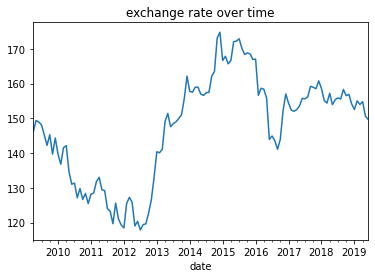

In [181]:
merged_df_jap["USDJPY"].plot(title='exchange rate over time')

plt.show()

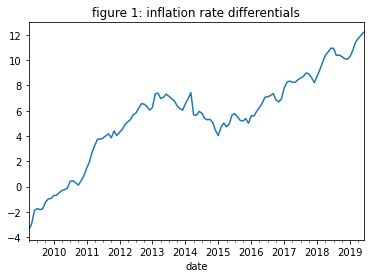

In [182]:
# diff_consumer
merged_df_jap["diff_consumer"].plot(title='figure 1: inflation rate differentials')

plt.show()

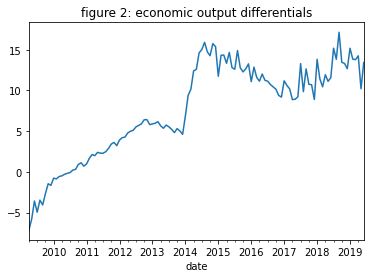

In [183]:
# diff_production
merged_df_jap["diff_production"].plot(title='figure 2: economic output differentials')

plt.show()

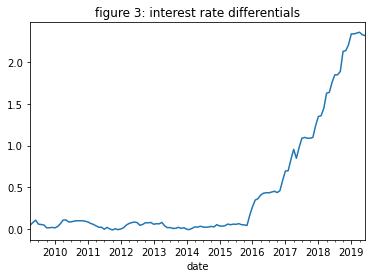

In [184]:
# diff_money_market
merged_df_jap["diff_money_market"].plot(title='figure 3: interest rate differentials')

plt.show()

## JAPAN

In [320]:
merged_df_jap["return"]=merged_df_jap.USDJPY.pct_change()
merged_df_jap['return']

date
2009-08-01         NaN
2009-09-01   -0.020284
2009-10-01    0.021479
2009-11-01   -0.038552
2009-12-01    0.033206
                ...   
2019-02-01    0.016108
2019-03-01   -0.006688
2019-04-01    0.005225
2019-05-01   -0.026967
2019-06-01   -0.006089
Name: return, Length: 119, dtype: float64

In [321]:
merged_df_jap=pd.DataFrame({'USDJPY':merged_df_jap.USDJPY,
                            'diff_consumer':merged_df_jap.diff_consumer,
                            'diff_money_market':merged_df_jap.diff_money_market,
                            'diff_production':merged_df_jap.diff_production,
                            'VIX':merged_df_jap.VIX,
                            "return":merged_df_jap['return'],
                            "position":np.zeros(len(merged_df_jap))},index=merged_df_jap.index)
for i in range(len(merged_df_jap)):
    if merged_df_jap["return"][i]>0:
        merged_df_jap["position"][i]=1
    else:
        merged_df_jap["position"][i]= -1
merged_df_jap=merged_df_jap[1:]

In [322]:
merged_df_jap["strategy_return"]=merged_df_jap["position"].shift()*merged_df_jap["return"]
#merged_df_jap['cumulative'] = np.append(0, np.cumsum(merged_df_jap['strategy_return']))

In [326]:
merged_df_jap=merged_df_jap[1:]


In [327]:
cumulative = np.append(0, np.cumsum(merged_df_jap['strategy_return']))
cumulative

array([ 0.        , -0.02147903, -0.06003091, -0.09323707, -0.12564668,
       -0.10515813, -0.1401982 , -0.13624465, -0.18921883, -0.16265265,
       -0.1651053 , -0.19727622, -0.21820183, -0.24233042, -0.25606533,
       -0.2791058 , -0.30079847, -0.29797961, -0.27241995, -0.26321806,
       -0.29023528, -0.28842763, -0.24828659, -0.24230655, -0.21315184,
       -0.26275761, -0.29861998, -0.28393663, -0.27656147, -0.3361052 ,
       -0.32204751, -0.3332891 , -0.27909888, -0.290302  , -0.31078838,
       -0.32373318, -0.32184409, -0.29623564, -0.26482258, -0.21365314,
       -0.1584059 , -0.1603859 , -0.16793703, -0.11168633, -0.09604894,
       -0.12128977, -0.12726789, -0.12379136, -0.1173508 , -0.11015606,
       -0.07977672, -0.03776525, -0.06499327, -0.06359276, -0.07274842,
       -0.07275222, -0.0604072 , -0.05782104, -0.06285889, -0.06232598,
       -0.03261501, -0.02454549,  0.0343633 ,  0.04416173, -0.00227813,
       -0.00935168, -0.02219175, -0.02812886,  0.00427057,  0.00

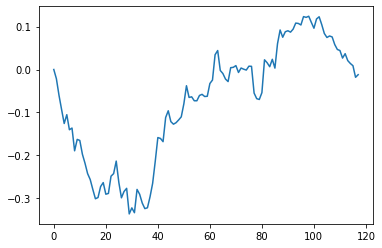

In [330]:
plt.plot(cumulative) 
plt.show() 

In [284]:
reg = smf.ols(formula = 'USDJPY ~ diff_consumer+diff_money_market+diff_production+VIX', data =merged_df_jap).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 USDJPY   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     33.72
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           9.52e-19
Time:                        23:24:08   Log-Likelihood:                -461.46
No. Observations:                 123   AIC:                             932.9
Df Residuals:                     118   BIC:                             947.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           138.6613      1.834     75.603      0.000     135.029     142.293
diff_consumer        -2.5655      0.543     -4.729      0.000      -3.640      -1.491
diff_money_market     4.3747      1.929      2.268      0.025       0.555       8.195
diff_production       2.7408      0.274     10.017      0.000       2.199       3.283
VIX                   0.2770      3.947      0.070      0.944      -7.540       8.094
==============================================================================
Omnibus:                        4.393   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.409
Skew:                          -0.033   Prob(JB):                        0.300
Kurtosis:                       2.318   Cond. No.                         47.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
pct = 0.75
train_ind = round(merged_df_jap.shape[0]*pct)

train = merged_df_jap["USDJPY"][:train_ind]
test = merged_df_jap["USDJPY"][train_ind:]

In [186]:
train

date
2009-04-01    146.188319
2009-05-01    149.386817
2009-06-01    148.936104
2009-07-01    148.078996
2009-08-01    145.174021
                 ...    
2016-07-01    144.911583
2016-08-01    143.561485
2016-09-01    141.088846
2016-10-01    143.979381
2016-11-01    152.149369
Name: USDJPY, Length: 92, dtype: float64

In [187]:
test

date
2016-12-01    157.017950
2017-01-01    154.362927
2017-02-01    152.380617
2017-03-01    152.034866
2017-04-01    152.526385
2017-05-01    153.590374
2017-06-01    155.751927
2017-07-01    155.626631
2017-08-01    156.179551
2017-09-01    159.221896
2017-10-01    158.940193
2017-11-01    158.526833
2017-12-01    160.784755
2018-01-01    158.593235
2018-02-01    155.172588
2018-03-01    154.385873
2018-04-01    157.194627
2018-05-01    153.933332
2018-06-01    155.355947
2018-07-01    155.898125
2018-08-01    155.554123
2018-09-01    158.319113
2018-10-01    156.511956
2018-11-01    156.899251
2018-12-01    154.141430
2019-01-01    152.563977
2019-02-01    155.021529
2019-03-01    153.984765
2019-04-01    154.789323
2019-05-01    150.615107
2019-06-01    149.697977
Name: USDJPY, dtype: float64

In [188]:
from statsmodels.tsa.arima_model import ARIMA


In [189]:
# Build Model
model = ARIMA(train, order=(2, 1, 0))
fitted = model.fit()  

# Model summary
print(fitted.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:               D.USDJPY   No. Observations:                   91
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -252.817
Method:                       css-mle   S.D. of innovations              3.893
Date:                Tue, 12 Apr 2022   AIC                            513.634
Time:                        22:57:36   BIC                            523.678
Sample:                    05-01-2009   HQIC                           517.686
                         - 11-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0725      0.429      0.169      0.866      -0.769       0.914
ar.L1.D.USDJPY     0.0214      0.107      0.200      0.841      -0.189       0.231
ar.L2.D.USDJPY     0.0272      0.107

In [190]:
fc, se, conf = fitted.forecast(len(test))  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [191]:
test

date
2016-12-01    157.017950
2017-01-01    154.362927
2017-02-01    152.380617
2017-03-01    152.034866
2017-04-01    152.526385
2017-05-01    153.590374
2017-06-01    155.751927
2017-07-01    155.626631
2017-08-01    156.179551
2017-09-01    159.221896
2017-10-01    158.940193
2017-11-01    158.526833
2017-12-01    160.784755
2018-01-01    158.593235
2018-02-01    155.172588
2018-03-01    154.385873
2018-04-01    157.194627
2018-05-01    153.933332
2018-06-01    155.355947
2018-07-01    155.898125
2018-08-01    155.554123
2018-09-01    158.319113
2018-10-01    156.511956
2018-11-01    156.899251
2018-12-01    154.141430
2019-01-01    152.563977
2019-02-01    155.021529
2019-03-01    153.984765
2019-04-01    154.789323
2019-05-01    150.615107
2019-06-01    149.697977
Name: USDJPY, dtype: float64

In [192]:
fc_pred=(lower_series+upper_series)/2


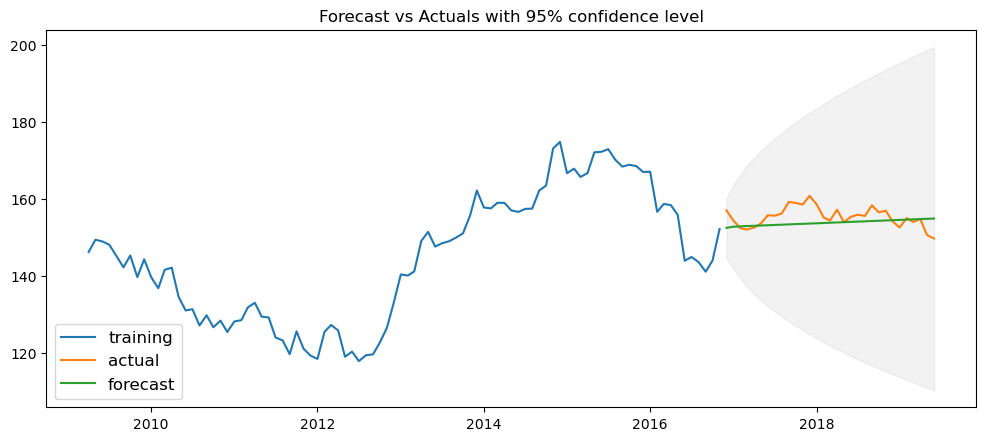

In [193]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_pred, label='forecast')
# draw confidence interval=0.05
plt.fill_between(test.index, lower_series,upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals with 95% confidence level')
plt.legend(loc='lower left', fontsize=12)
plt.show()

In [194]:
import numpy as np
import statsmodels.formula.api as smf

In [219]:
japan=pd.merge(df2[['USDJPY','Consumer Prices_jap','Money Market Rate_jap',"Production_Prices_jap"]], 
                         df3[['Consumer Prices_us','Money Market Rate_us',"Production_Prices_us"]], 
         on="date"
                         )


In [221]:
japan=pd.merge(japan[['USDJPY','Consumer Prices_jap','Money Market Rate_jap',"Production_Prices_jap",'Consumer Prices_us','Money Market Rate_us',"Production_Prices_us"]],df_m[["VIX"]],on="date")

In [222]:
japan['date'] = japan.index
japan

,USDJPY,Consumer Prices_jap,Money Market Rate_jap,Production_Prices_jap,Consumer Prices_us,Money Market Rate_us,Production_Prices_us,VIX,date
date,,,,,,,,,
2009-04-01,146.188319,101.225727,0.104000,100.772628,97.791617,0.15,93.643528,-0.173086,2009-04-01
2009-05-01,149.386817,101.018509,0.102000,100.382037,98.074114,0.18,94.584947,-0.207671,2009-05-01
2009-06-01,148.936104,100.811292,0.104000,99.991445,98.916560,0.21,96.412408,-0.088866,2009-06-01
2009-07-01,148.078996,100.500466,0.102000,100.479684,98.759719,0.16,95.526366,-0.016319,2009-07-01
2009-08-01,145.174021,100.811292,0.106000,100.382037,98.981223,0.16,96.910807,0.003472,2009-08-01
...,...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,105.150290,0.062629,100.497420,115.922781,2.40,114.334876,-0.112855,2019-02-01
2019-03-01,153.984765,105.150290,0.062629,100.010985,116.576743,2.41,113.792423,-0.067347,2019-03-01
2019-04-01,154.789323,105.466690,0.062629,99.913698,117.194017,2.42,114.159272,-0.043034,2019-04-01


In [223]:
### Data Cleaning : Use observations from 1973M3 to 2006M5
## Dependent Variable : s_t+1, s_t
# s_current : log of nominal exchange rates at t
s_current = np.log(japan.iloc[2:len(japan)-2,0]).reset_index(drop=True)
#Why reset index? To combine into a single data set later

s_current = s_current.rename('s_current').reset_index(drop=True)


# s_future : log of nominal exchange rates at t+1
s_future = np.log(japan.iloc[3:,0]).reset_index(drop=True)
s_future = s_future.rename('s_future')


# s_change : change in log of exchange rates (s_t+1 - s_t)
s_change = s_future - s_current
s_change = s_change.rename('s_change')

In [233]:
# inf_us, inf_japan : us inflation at t, japan inflation at t
inf_japan = japan.iloc[2:len(japan)-2,1].reset_index(drop=True)
inf_us = japan.iloc[2:len(japan)-2,4].reset_index(drop=True)
inf_diff = inf_us - inf_japan
inf_diff = inf_diff.rename('inf_diff')

# output_us, output_japan : us output at t, japan output at t
output_japan = japan.iloc[2:len(japan)-2,3].reset_index(drop=True)
output_us = japan.iloc[2:len(japan)-2,6].reset_index(drop=True)
output_diff = output_us - output_japan
output_diff = output_diff.rename('output_diff')

# int_us, int_japan : us interest at t, japan output at t
int_japan = japan.iloc[2:len(japan)-2,2].reset_index(drop=True)
int_us = japan.iloc[2:len(japan)-2,5].reset_index(drop=True)
int_diff = int_us - int_japan
int_diff = int_diff.rename('int_diff')
#VIX=df_m["VIX"]

# date : Time at t+1
date = japan.iloc[3:,-1].reset_index(drop=True)

In [234]:
date

0     2009-07-01
1     2009-08-01
2     2009-09-01
3     2009-10-01
4     2009-11-01
         ...    
115   2019-02-01
116   2019-03-01
117   2019-04-01
118   2019-05-01
119   2019-06-01
Name: date, Length: 120, dtype: datetime64[ns]

In [236]:
#date = japan.iloc[25:,-1].reset_index(drop=True)
japan_const = pd.concat([date, s_future, s_current, s_change, inf_diff, output_diff,int_diff], axis=1)
#japan_const=japan_const.dropna()
japan_const

,date,s_future,s_current,s_change,inf_diff,output_diff,int_diff
0,2009-07-01,4.997746,5.003517,-0.005771,-1.894732,-3.579037,0.106000
1,2009-08-01,4.977933,4.997746,-0.019813,-1.740746,-4.953318,0.058000
2,2009-09-01,4.957440,4.977933,-0.020493,-1.830069,-3.471230,0.054000
3,2009-10-01,4.978692,4.957440,0.021252,-1.768159,-4.067276,0.048000
4,2009-11-01,4.939377,4.978692,-0.039315,-1.258335,-2.676940,0.014000
...,...,...,...,...,...,...,...
115,2019-02-01,5.043564,5.027584,0.015980,10.284542,15.176953,2.337371
116,2019-03-01,5.036854,5.043564,-0.006710,10.772491,13.837456,2.337371
117,2019-04-01,5.042065,5.036854,0.005211,11.426453,13.781438,2.347371
118,2019-05-01,5.014728,5.042065,-0.027337,11.727327,14.245574,2.357371


In [237]:
japan_const.loc[:10,"date"]

0    2009-07-01
1    2009-08-01
2    2009-09-01
3    2009-10-01
4    2009-11-01
5    2009-12-01
6    2010-01-01
7    2010-02-01
8    2010-03-01
9    2010-04-01
10   2010-05-01
Name: date, dtype: datetime64[ns]

In [238]:
## Make sure all columns have float numbers
japan_const.loc[:,'s_future'] = japan_const.loc[:,'s_future'].apply(float)
japan_const.loc[:,'s_current'] = japan_const.loc[:,'s_current'].apply(float)
japan_const.loc[:,'s_change'] = japan_const.loc[:,'s_change'].apply(float)
japan_const.loc[:,'inf_diff'] = japan_const.loc[:,'inf_diff'].apply(float)
#japan_const.loc[:,'gap_diff'] = japan_const.loc[:,'gap_diff'].apply(float)

In [239]:
japan_const['s_change_fitted'] = np.nan

# Out-of-sample Forecasts with rolling window : Here, we use the first 120 observations
# formula: s_change ~ inf_diff + gap_diff + coef
for i in range(20,len(japan_const)):
    tmp = smf.ols(formula = 's_change ~ inf_diff+ output_diff+int_diff', 
                  data=japan_const[i-20:i]).fit()
    japan_const.loc[i,'s_change_fitted'] = tmp.predict(japan_const[['inf_diff', 'output_diff',"int_diff"]][i:i+1])[i]

japan_const['s_forecast'] = japan_const['s_change_fitted'] + japan_const['s_current']

In [240]:
japan_const

,date,s_future,s_current,s_change,inf_diff,output_diff,int_diff,s_change_fitted,s_forecast
0,2009-07-01,4.997746,5.003517,-0.005771,-1.894732,-3.579037,0.106000,NaN,NaN
1,2009-08-01,4.977933,4.997746,-0.019813,-1.740746,-4.953318,0.058000,NaN,NaN
2,2009-09-01,4.957440,4.977933,-0.020493,-1.830069,-3.471230,0.054000,NaN,NaN
3,2009-10-01,4.978692,4.957440,0.021252,-1.768159,-4.067276,0.048000,NaN,NaN
4,2009-11-01,4.939377,4.978692,-0.039315,-1.258335,-2.676940,0.014000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115,2019-02-01,5.043564,5.027584,0.015980,10.284542,15.176953,2.337371,-0.016445,5.011140
116,2019-03-01,5.036854,5.043564,-0.006710,10.772491,13.837456,2.337371,-0.001805,5.041759
117,2019-04-01,5.042065,5.036854,0.005211,11.426453,13.781438,2.347371,0.000401,5.037255
118,2019-05-01,5.014728,5.042065,-0.027337,11.727327,14.245574,2.357371,0.003083,5.045148


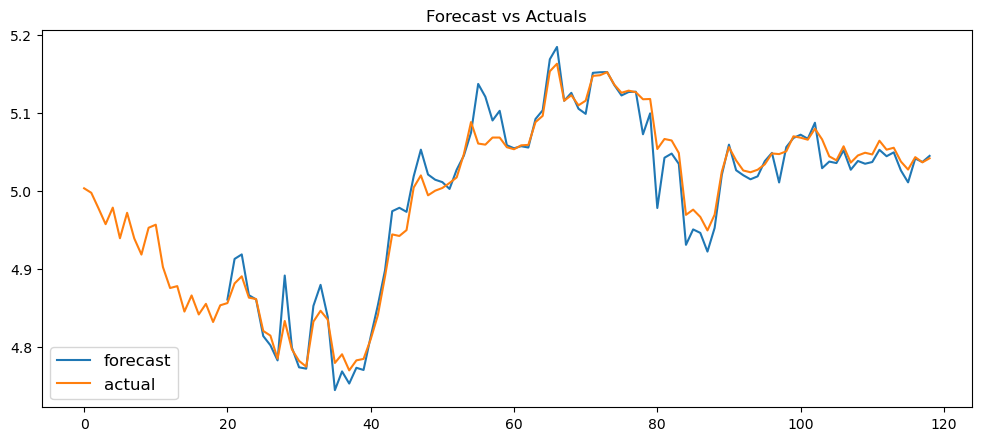

In [241]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(japan_const['s_forecast'], label='forecast')
plt.plot(japan_const['s_current'], label='actual')
plt.title("Forecast vs Actuals")
plt.legend(loc='lower left', fontsize=12)
plt.show()

## LASSO

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [346]:
X = merged_df_jap.iloc[:,1:]
y = merged_df_jap[['USDJPY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)

In [347]:
# Step 1 : Fit Lasso
lasso = Lasso().fit(X_train, y_train)

# Step 2 : Create a grid containing the potential values of lambdas
lasso_lambdas = {'alpha':np.linspace(0.001, 0.1, 20)}

In [348]:
lasso_lambdas

{'alpha': array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
        0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
        0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
        0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ])}

In [349]:
# Step 3 : Among the grid of lambdas, select the lambda that gives you the least error rate using cross-validation
lasso_best = GridSearchCV(lasso, lasso_lambdas, cv=5, scoring = 'neg_mean_squared_error').fit(X_train, y_train)

In [350]:
lasso_best

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ])},
             scoring='neg_mean_squared_error')

In [351]:
lasso_best.best_estimator_

Lasso(alpha=0.1)

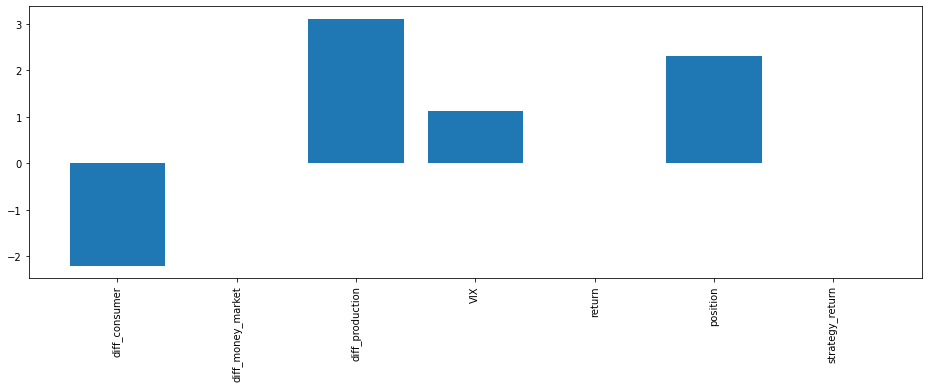

In [352]:
# Step 4 : See the magnitude of the coefficients
lasso_coef = lasso_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X.columns.values.tolist(), lasso_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

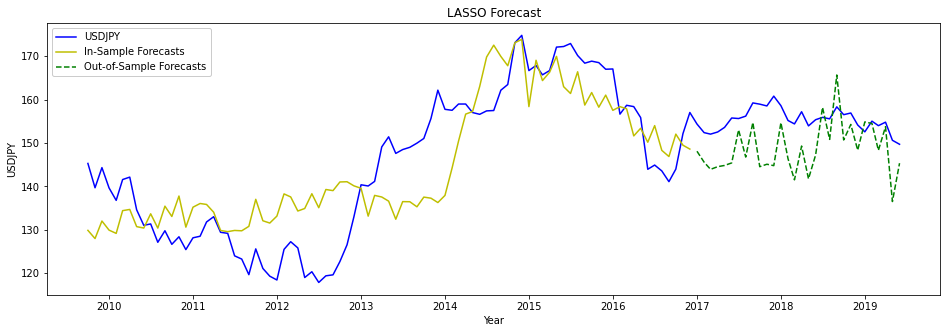

In [353]:
# Step 5 : Forecast using the test data
y_pred_in = lasso_best.predict(X_train)
y_pred_out = lasso_best.predict(X_test)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y.index, y, color='b', label='USDJPY')
plt.plot(y_train.index, y_pred_in, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test.index, y_pred_out, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="LASSO Forecast", xlabel="Year", ylabel="USDJPY")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [383]:
merged_df_jap=merged_df_jap.dropna()

In [386]:
X2=merged_df_jap.drop(['VIX'], axis=1)
y2 = merged_df_jap[['USDJPY']]

In [387]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, shuffle=False)

In [388]:
# Step 1 : Fit Lasso
lasso2 = Lasso().fit(X_train2, y_train2)

# Step 2 : Create a grid containing the potential values of lambdas
lasso_lambdas2 = {'alpha':np.linspace(0.001, 0.1, 20)}

In [389]:
lasso_best2 = GridSearchCV(lasso2, lasso_lambdas2, cv=5, scoring = 'neg_mean_squared_error').fit(X_train2, y_train2)

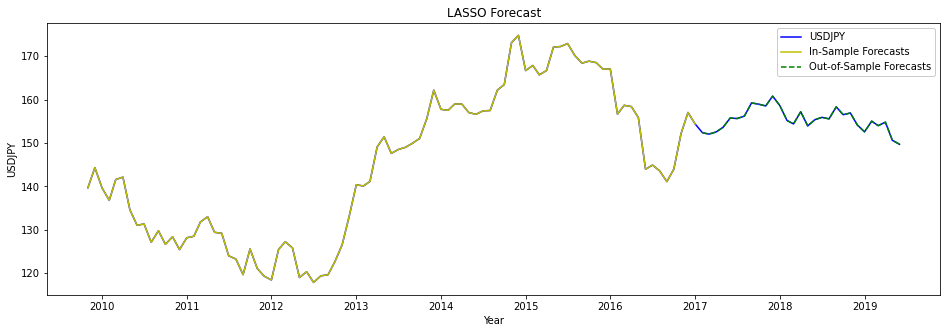

In [391]:
# Step 5 : Forecast using the test data
y_pred_in2 = lasso_best2.predict(X_train2)
y_pred_out2 = lasso_best2.predict(X_test2)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y2.index, y2, color='b', label='USDJPY')
plt.plot(y_train2.index, y_pred_in2, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test2.index, y_pred_out2, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="LASSO Forecast", xlabel="Year", ylabel="USDJPY")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [393]:
from sklearn.metrics import mean_squared_error

In [394]:
# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train2, y_pred_in2),6)
out_sample_mse = round(mean_squared_error(y_test2, y_pred_out2),6)
print('Lasso In-Sample MSE : ', in_sample_mse ,'\nLasso Out-of-Sample MSE : ', out_sample_mse)

Lasso In-Sample MSE :  0.0 
Lasso Out-of-Sample MSE :  0.0


In [355]:
merged_df_jap["forecast"]=lasso.predict(X)

C:\Users\PEIYAO~1\AppData\Local\Temp/ipykernel_1840/2619999683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jap["forecast"]=lasso.predict(X)


In [357]:
merged_df_jap["forecast_return"]=merged_df_jap.forecast.pct_change()
merged_df_jap['forecast_return']

C:\Users\PEIYAO~1\AppData\Local\Temp/ipykernel_1840/1018301698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jap["forecast_return"]=merged_df_jap.forecast.pct_change()


date
2009-10-01         NaN
2009-11-01    0.004608
2009-12-01    0.014699
2010-01-01   -0.002458
2010-02-01   -0.002593
                ...   
2019-02-01   -0.014868
2019-03-01   -0.025049
2019-04-01    0.022240
2019-05-01   -0.096978
2019-06-01    0.065622
Name: forecast_return, Length: 117, dtype: float64

In [361]:
lasso_forecast=pd.DataFrame({'USDJPY':merged_df_jap.USDJPY,
                            'diff_consumer':merged_df_jap.diff_consumer,
                            'diff_money_market':merged_df_jap.diff_money_market,
                            'diff_production':merged_df_jap.diff_production,
                            'VIX':merged_df_jap.VIX,
                            "forecast_return":merged_df_jap['forecast_return'],
                            "position":np.zeros(len(merged_df_jap))},index=merged_df_jap.index)
for i in range(len(merged_df_jap)):
    if merged_df_jap["forecast_return"][i]>0:
        lasso_forecast["position"][i]=1
    else:
        lasso_forecast["position"][i]= -1
lasso_forecast=lasso_forecast[1:]

In [369]:
merged_df_jap

,USDJPY,diff_consumer,diff_money_market,diff_production,VIX,return,position,strategy_return,forecast,forecast_return
date,,,,,,,,,,
2009-10-01,145.284225,-1.258335,0.014000,-2.676940,0.198360,0.021479,1.0,-0.021479,127.876367,NaN
2009-11-01,139.683245,-0.980952,0.015000,-1.458632,-0.201369,-0.038552,-1.0,-0.038552,128.465599,0.004608
2009-12-01,144.321590,-0.948461,0.019000,-1.654520,-0.115463,0.033206,1.0,-0.033206,130.353969,0.014699
2010-01-01,139.644183,-0.715481,0.014000,-0.769177,0.135609,-0.032410,-1.0,-0.032410,130.033590,-0.002458
2010-02-01,136.783077,-0.690717,0.029000,-0.867417,-0.207961,-0.020489,-1.0,0.020489,129.696368,-0.002593
...,...,...,...,...,...,...,...,...,...,...
2019-02-01,155.021529,10.772491,2.337371,13.837456,-0.112855,0.016108,1.0,-0.016108,155.121474,-0.014868
2019-03-01,153.984765,11.426453,2.347371,13.781438,-0.067347,-0.006688,-1.0,-0.006688,151.235768,-0.025049
2019-04-01,154.789323,11.727327,2.357371,14.245574,-0.043034,0.005225,1.0,-0.005225,154.599299,0.022240


In [362]:
lasso_forecast

,USDJPY,diff_consumer,diff_money_market,diff_production,VIX,forecast_return,position
date,,,,,,,
2009-11-01,139.683245,-0.980952,0.015000,-1.458632,-0.201369,0.004608,1.0
2009-12-01,144.321590,-0.948461,0.019000,-1.654520,-0.115463,0.014699,1.0
2010-01-01,139.644183,-0.715481,0.014000,-0.769177,0.135609,-0.002458,-1.0
2010-02-01,136.783077,-0.690717,0.029000,-0.867417,-0.207961,-0.002593,-1.0
2010-03-01,141.575964,-0.493497,0.063000,-0.572698,-0.097949,0.023502,1.0
...,...,...,...,...,...,...,...
2019-02-01,155.021529,10.772491,2.337371,13.837456,-0.112855,-0.014868,-1.0
2019-03-01,153.984765,11.426453,2.347371,13.781438,-0.067347,-0.025049,-1.0
2019-04-01,154.789323,11.727327,2.357371,14.245574,-0.043034,0.022240,1.0


In [370]:
lasso_forecast["strategy_return"]=lasso_forecast["position"].shift()*lasso_forecast["forecast_return"]
cumulative2 = np.append(0, np.cumsum(lasso_forecast['strategy_return']))

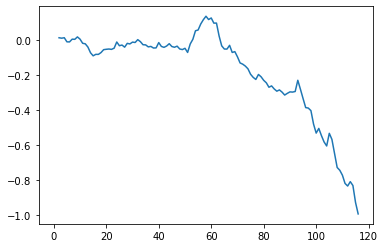

In [371]:
plt.plot(cumulative2) 
plt.show() 

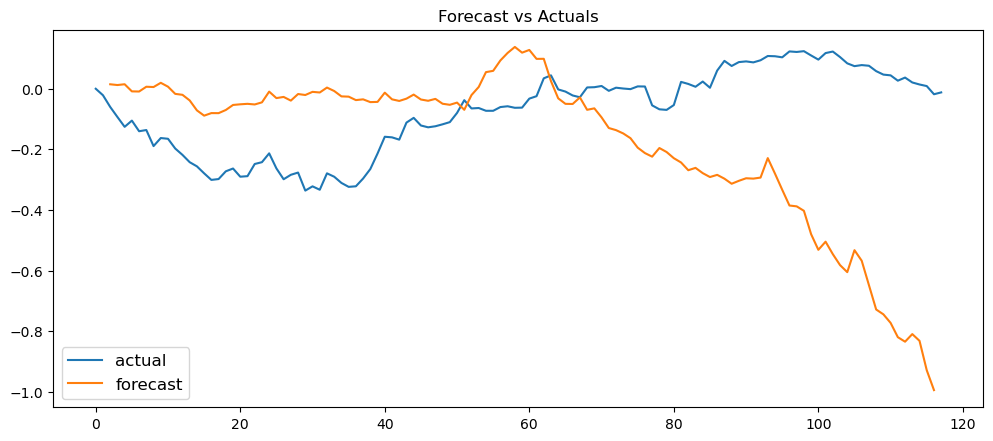

In [373]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cumulative, label='actual')
plt.plot(cumulative2, label='forecast')
plt.title("Forecast vs Actuals")
plt.legend(loc='lower left', fontsize=12)
plt.show()

In [364]:
import random

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import random
def randomwalk1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions

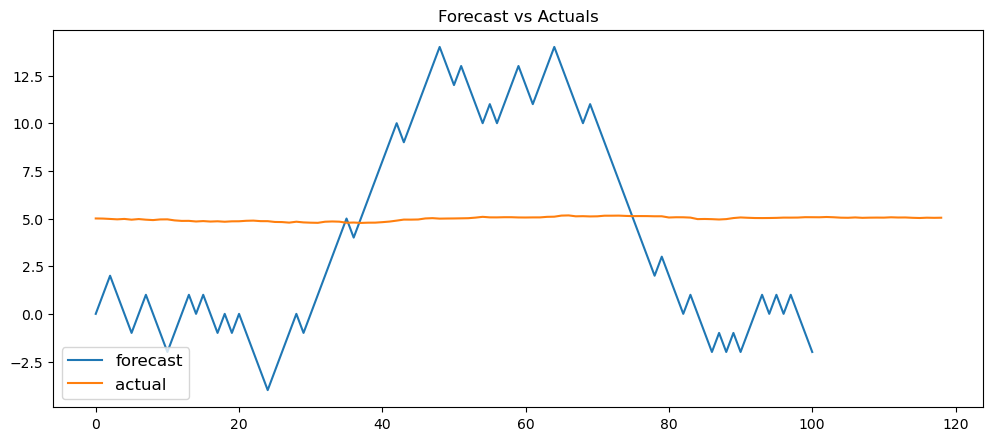

In [212]:
time_data, pos_data = randomwalk1D(100)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(time_data, pos_data, label='forecast')
plt.plot(japan_const['s_current'], label='actual')
plt.title("Forecast vs Actuals")
plt.legend(loc='lower left', fontsize=12)
plt.show()

## ACCURACY

In [213]:
# calculate MSE Taylor
japan_const2=japan_const.dropna()
mse_m1 = np.mean(np.square(japan_const2['s_current'].values -japan_const2['s_forecast'].values))

print(round(mse_m1,6))

0.000449


In [214]:
# autoregressive
mse_m2 = round(np.mean(test -fc_pred),6)
print("Taylor Rule Model: MSE: ",round(mse_m1,6))
print("Autoregressive Model: MSE: ",round(mse_m2,6))

Taylor Rule Model: MSE:  0.000449
Autoregressive Model: MSE:  1.545895


In [215]:
japan_const2

,date,s_future,s_current,s_change,inf_diff,output_diff,int_diff,s_change_fitted,s_forecast
20,2011-03-01,4.881308,4.856070,0.025238,1.931496,1.655874,0.067000,0.004557,4.860627
21,2011-04-01,4.890468,4.881308,0.009160,2.710219,2.124970,0.055000,0.031491,4.912799
22,2011-05-01,4.863079,4.890468,-0.027389,3.264676,1.991364,0.038000,0.028118,4.918586
23,2011-06-01,4.861270,4.863079,-0.001809,3.749873,2.393165,0.021000,0.003140,4.866219
24,2011-07-01,4.820301,4.861270,-0.040969,3.744359,2.294925,0.021000,-0.000483,4.860787
...,...,...,...,...,...,...,...,...,...
114,2019-01-01,5.027584,5.037871,-0.010287,10.064873,12.661803,2.207371,-0.011451,5.026419
115,2019-02-01,5.043564,5.027584,0.015980,10.284542,15.176953,2.337371,-0.016445,5.011140
116,2019-03-01,5.036854,5.043564,-0.006710,10.772491,13.837456,2.337371,-0.001805,5.041759
117,2019-04-01,5.042065,5.036854,0.005211,11.426453,13.781438,2.347371,0.000401,5.037255


In [216]:
# import the SPY and AAPL
import pandas_datareader as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [217]:
# Import and clean data

# Create the start and end date for API requests
start = datetime.datetime(1995, 1, 1)
end = datetime.datetime(2021, 1, 1)

# Let's create a function to load in a time series for us
def loadAssetSeries(ticker, series_name, start, end):
    df = web.DataReader(ticker, 'yahoo', start, end)
    df = df[['Adj Close']]
    df = df.rename(columns = {'Adj Close': series_name})
    df[series_name + "_daily_return"] = df[series_name].pct_change()
    df = df[1:]
    df.index.rename("DATE", inplace=True)
    return(df)

# Let's get the S&P 500 price from Yahoo finance and clean it up.
#    Technically this the price of an ETF called SPY 
#    but it has near correlation of 1 with the actual S&P500
df1 = loadAssetSeries("SPY", "SP500", start, end)



In [236]:
df1

,SP500,SP500_daily_return
DATE,,
1995-01-04,28.151091,0.004779
1995-01-05,28.151091,0.000000
1995-01-06,28.179770,0.001019
1995-01-09,28.208460,0.001018
1995-01-10,28.237150,0.001017
...,...,...
2020-12-24,363.018250,0.003890
2020-12-28,366.136871,0.008591
2020-12-29,365.438354,-0.001908


In [238]:
# Data is ~daily returns; let's get monthly returns
df_m = df1.resample("M").last()
df_m = df_m[['SP500']]
df_m['SP500_monthly_return'] = df_m.SP500.pct_change()
#df_m['AAPL_monthly_return'] = df_m.AAPL.pct_change()
df_m = df_m[1:]

In [247]:
df_m=df_m[227:] 

In [248]:
def skewness(returns):
    n = len(returns)
    mean = returns.mean()
    std = np.sqrt(np.sum(np.square(returns - mean))/(n-1))
    skewness = np.mean(np.power((returns - mean)/std, 3))
    return(skewness)

In [249]:
skewness(df_m['SP500_monthly_return'])

-0.34923308675378717

In [260]:
skewness(japan_const2["s_change_fitted"])

-1.9279004609457855

In [285]:
print("Taylor Rule Model: Skewness: ",skewness(japan_const2["s_change_fitted"]))
print("S&P 500: Skewness: ",skewness(df_m['SP500_monthly_return']))

Taylor Rule Model: Skewness:  -1.9279004609457855
S&P 500: Skewness:  -0.34923308675378717


In [255]:
def sharpe_ratio(returns, rfr):
    excess_returns = returns - rfr
    n = len(excess_returns)
    mean = excess_returns.mean()
    # use unbiased sd
    std = np.sqrt(np.sum(np.square(excess_returns - mean))/(n-1))
    return(mean/std)

In [261]:
# Assume a 2% risk free rate
monthly_risk_free_rate = 1.02**(1/12)-1
sharpe_ratio(japan_const2["s_change_fitted"], monthly_risk_free_rate)

-0.5381986091675323

In [262]:
# Assume a 2% risk free rate
monthly_risk_free_rate = 1.02**(1/12)-1
sharpe_ratio(df_m['SP500_monthly_return'], monthly_risk_free_rate)

0.2268385772776631

In [286]:
print("Taylor Rule Model: Sharp Ratio: ",sharpe_ratio(japan_const2["s_change_fitted"], monthly_risk_free_rate))
print("S&P 500: Sharp Ratio: ",sharpe_ratio(df_m['SP500_monthly_return'], monthly_risk_free_rate))

Taylor Rule Model: Sharp Ratio:  -0.5381986091675323
S&P 500: Sharp Ratio:  0.2268385772776631


## return

In [280]:
japan_const2['s_change_fitted'].mean()

-0.006228821923991698

In [281]:
df_m['SP500_monthly_return'].mean()

0.010890740728662118

In [287]:
print("Taylor Rule Model: Mean Return: ",japan_const2['s_change_fitted'].mean())
print("S&P 500: Mean Return: ",df_m['SP500_monthly_return'].mean())

Taylor Rule Model: Mean Return:  -0.006228821923991698
S&P 500: Mean Return:  0.010890740728662118


In [263]:
def plot_returns(df, column, title):
    n, bins, patches = plt.hist(x=df[column], bins='auto', 
                                color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.ylabel(None)
    plt.title(title)
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

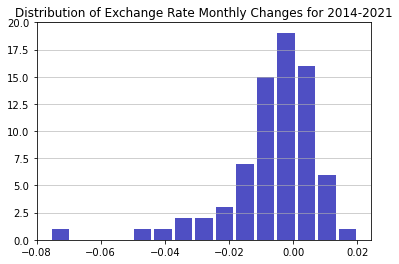

In [279]:
title = 'Distribution of Exchange Rate Monthly Changes for 2014-2021'
plot_returns(japan_const2, 's_change_fitted', title)

In [271]:
japan_const2

,date,s_future,s_current,s_change,inf_diff,output_diff,int_diff,s_change_fitted,s_forecast,500
20,2015-12-01,5.117877,5.126947,-0.009070,5.379192,12.650842,0.042000,0.000640,5.127587,NaN
21,2016-01-01,5.118234,5.117877,0.000357,5.007268,13.257555,0.165000,-0.044962,5.072915,NaN
22,2016-02-01,5.053957,5.118234,-0.064277,5.608447,11.079299,0.266000,-0.018453,5.099781,NaN
23,2016-03-01,5.066860,5.053957,0.012903,5.592407,12.859015,0.347000,-0.075740,4.978217,NaN
24,2016-04-01,5.064950,5.066860,-0.001911,5.955170,11.597093,0.363000,-0.024100,5.042760,NaN
...,...,...,...,...,...,...,...,...,...,...
89,2021-08-01,5.052947,5.052740,0.000208,20.048570,20.937189,0.070125,0.004308,5.057047,NaN
90,2021-09-01,5.060484,5.052947,0.007537,20.307220,25.141164,0.060125,0.003443,5.056390,NaN
91,2021-10-01,5.080522,5.060484,0.020038,20.226092,25.920783,0.757516,-0.004653,5.055831,NaN
92,2021-10-01,5.080522,5.080522,0.000000,22.028210,15.922536,0.757516,-0.002700,5.077821,NaN


In [272]:
japan_const2.set_index('date', inplace=True)


In [273]:
japan_const2

,s_future,s_current,s_change,inf_diff,output_diff,int_diff,s_change_fitted,s_forecast,500
date,,,,,,,,,
2015-12-01,5.117877,5.126947,-0.009070,5.379192,12.650842,0.042000,0.000640,5.127587,NaN
2016-01-01,5.118234,5.117877,0.000357,5.007268,13.257555,0.165000,-0.044962,5.072915,NaN
2016-02-01,5.053957,5.118234,-0.064277,5.608447,11.079299,0.266000,-0.018453,5.099781,NaN
2016-03-01,5.066860,5.053957,0.012903,5.592407,12.859015,0.347000,-0.075740,4.978217,NaN
2016-04-01,5.064950,5.066860,-0.001911,5.955170,11.597093,0.363000,-0.024100,5.042760,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-01,5.052947,5.052740,0.000208,20.048570,20.937189,0.070125,0.004308,5.057047,NaN
2021-09-01,5.060484,5.052947,0.007537,20.307220,25.141164,0.060125,0.003443,5.056390,NaN
2021-10-01,5.080522,5.060484,0.020038,20.226092,25.920783,0.757516,-0.004653,5.055831,NaN


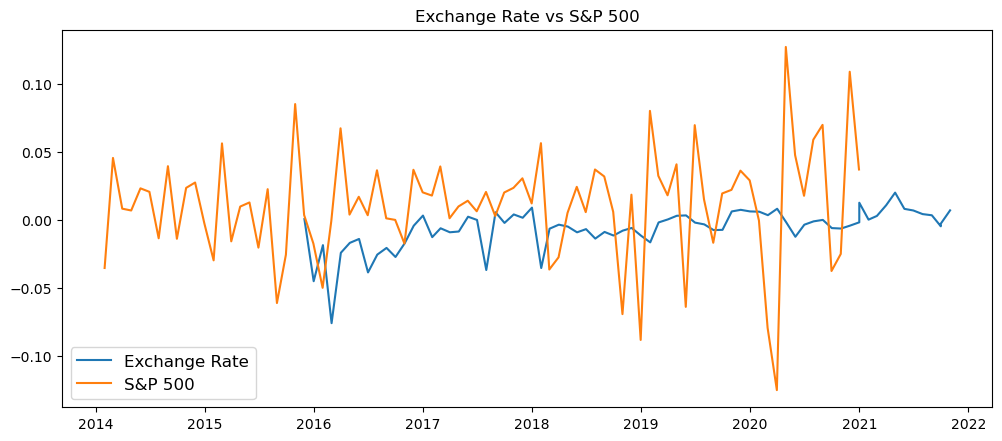

In [278]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(japan_const2['s_change_fitted'], label='Exchange Rate')
plt.plot(df_m['SP500_monthly_return'], label='S&P 500')
plt.title("Exchange Rate vs S&P 500")
plt.legend(loc='lower left', fontsize=12)
plt.show()

## aus table

In [ ]:
x_aus=merged_df_aus[['diff_export','diff_consumer']]
y_aus=merged_df_aus[['National Currency per SDR, End of Period_aus']]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x_aus,y_aus)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_aus, y_aus, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x1_train, y1_train)

# Make predictions based on the test sample
y1_pred = regr.predict(x1_test)

# Evaluate Performance

print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

# Perform a 5-fold CV
# Use MSE as the scoring function (there are other options as shown here:
# https://scikit-learn.org/stable/modules/model_evaluation.html

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x_aus, y_aus, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)


## linear regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X1_scaled = MinMaxScaler().fit_transform(x_aus)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y_aus, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)

## random forest

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
reg_tree_t2 = DecisionTreeRegressor(criterion='mse',
                                    splitter='best',
                                    max_depth=4,
                                    min_samples_split=2,
                                    min_samples_leaf=50,
                                    min_weight_fraction_leaf=0.0,
                                    max_features=None,
                                    random_state=42,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None)

In [ ]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X_train, y_train)
text_representation = tree.export_text(regr)
print(text_representation)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(model.predict(X_test))
plt.plot(y_test["National Currency per SDR, End of Period_aus"].values)

## comparision between linear and random forest

In [ ]:
#linear
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

In [ ]:
#random forest
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

In [ ]:
#linear regression MSE
np.mean((y_test - lr.predict(X_test).reshape(25,1))**2)

In [ ]:
#Random Forest MSE
np.mean((y_test - model.predict(X_test).reshape(25,1))**2)

#### based on the mse and scores, random forest has a better predictability in aus table.

## return

In [ ]:
merged_df_aus.head()

In [ ]:
#simple return
merged_df_aus["simple_return"]= merged_df_aus["National Currency per SDR, End of Period_aus"].pct_change()

In [ ]:
#cumulative return
merged_df_aus["cumulative_return"]=np.cumsum(merged_df_aus["simple_return"])
merged_df_aus

In [ ]:
# monthly return
df_m = merged_df_aus.resample("M").last()
df_m = df_m[['National Currency per SDR, End of Period_aus']]
df_m['monthly_return'] = df_m["National Currency per SDR, End of Period_aus"].pct_change()

In [ ]:
# Plot monthly returns

def plot_returns(df, column, title):
    n, bins, patches = plt.hist(x=df[column], bins='auto', 
                                color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.ylabel(None)
    plt.title(title)
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
title = 'Distribution of monthly returns for 2014-2021'
plot_returns(df_m, 'monthly_return', title)

## jap table

In [ ]:
x_jap=merged_df_jap[['diff_consumer','diff_export','diff_money_market']]
y_jap=merged_df_jap[['National Currency per SDR, End of Period_jap']]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


# Perform an OLS fit using all the data
lr = LinearRegression()
model2 = lr.fit(x_aus,y_aus)
lr.coef_
lr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_jap, y_jap, test_size=0.3, random_state=0)

# Train the model:
lr = LinearRegression()
lr.fit(x2_train, y2_train)

# Make predictions based on the test sample
y2_pred = lr.predict(x2_test)

# Evaluate Performance

print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

# Perform a 5-fold CV
# Use MSE as the scoring function (there are other options as shown here:
# https://scikit-learn.org/stable/modules/model_evaluation.html

lr = linear_model.LinearRegression()
scores = cross_val_score(lr, x_jap, y_jap, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)


## linear

In [ ]:
X2_scaled = MinMaxScaler().fit_transform(x_jap)

In [ ]:
X_train_jap, X_test_jap, y_train_jap, y_test_jap = train_test_split(X2_scaled, y_jap, random_state=0)

lr = LinearRegression().fit(X_train_jap, y_train_jap)
print("lr.coef_:", lr.coef_)

## random forest

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
reg_tree = DecisionTreeRegressor(criterion='mse',
                                    splitter='best',
                                    max_depth=4,
                                    min_samples_split=2,
                                    min_samples_leaf=50,
                                    min_weight_fraction_leaf=0.0,
                                    max_features=None,
                                    random_state=42,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None)

In [ ]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model2 = regr.fit(X_train_jap, y_train_jap)
text_representation = tree.export_text(regr)
print(text_representation)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(model2.predict(X_test_jap))
plt.plot(y_test_jap["National Currency per SDR, End of Period_jap"].values)

## comparison between linear and random forest

In [ ]:
#linear
print("Training set score: {:.2f}".format(lr.score(X_train_jap, y_train_jap)))
print("Test set score: {:.2f}".format(lr.score(X_test_jap, y_test_jap)))

In [ ]:
#random forest
print("Training set score: {:.2f}".format(model2.score(X_train_jap, y_train_jap)))
print("Test set score: {:.2f}".format(model2.score(X_test_jap, y_test_jap)))

In [ ]:
#linear regression MSE
np.mean((y_test_jap - lr.predict(X_test_jap))**2)

In [ ]:
#Random Forest MSE
np.mean((y_test_jap - model2.predict(X_test_jap).reshape(25,1))**2)

#### based on the mse and scores, random forest has a better predictability in jap table.